In [4]:
%matplotlib widget
import os, sys

from common import *

# Load Experiments

An experiment consists of several replicas of STGEM runs on a given benchmark.
The replicas of an experiment correspond to files on a certain path with file
names having a common prefix. Currently the file organization is as follows.
The subdirectories of the base directory (by default `output`) correspond to
the benchmarks. Whenever a replica prefix is specified, all files (including
subdirectories) under `output/benchmark` that have the matching prefix
are collected into one experiment.

In [93]:
# Default path containing subdirectory for each benchmark.
output_path_base = os.path.join("..", "output")

# Which benchmarks are to be included.
#benchmarks = ["AT"]
benchmarks = ["AFC", "AT"]

# Replica prefixes for collecting the experiments.
replica_prefixes = {"AFC": ["AFC27"],
                    "AT": ["AT1", "ATX13", "ATX14", "ATX2", "ATX61", "ATX62"],
                    "F16": ["F16"]}

experiments = loadExperiments(output_path_base, benchmarks, replica_prefixes)

# Falsification Rate and First Falsifications

In [94]:
print("Experiment: Falsification rates:")
for benchmark in benchmarks:
    for experiment in experiments[benchmark]:
        FR = falsification_rate(experiments[benchmark][experiment])
        print("{}/{}, {}".format(benchmark, experiment, FR))

Experiment: Falsification rates:
AFC/AFC27, 1.0
AT/AT1, 1.0
AT/ATX13, 0.86
AT/ATX14, 1.0
AT/ATX1, 0.93
AT/ATX2, 0.5
AT/ATX61, 0.96
AT/ATX62, 0.68


Experiment: Mean: SD:
AFC/AFC27, 73.18, 12.451007991323433
AT/AT1, 83.54, 20.16056546826006
AT/ATX13, 53.2093023255814, 71.23872677509408
AT/ATX14, 61.46, 37.265646378400575
AT/ATX1, 57.645161290322584, 55.76769118237454
AT/ATX2, 156.44, 79.73961625189827
AT/ATX61, 92.72916666666667, 60.32576135150629
AT/ATX62, 107.67647058823529, 33.40281829271586


<module 'matplotlib.pyplot' from '/home/japeltom/.local/lib/python3.9/site-packages/matplotlib/pyplot.py'>

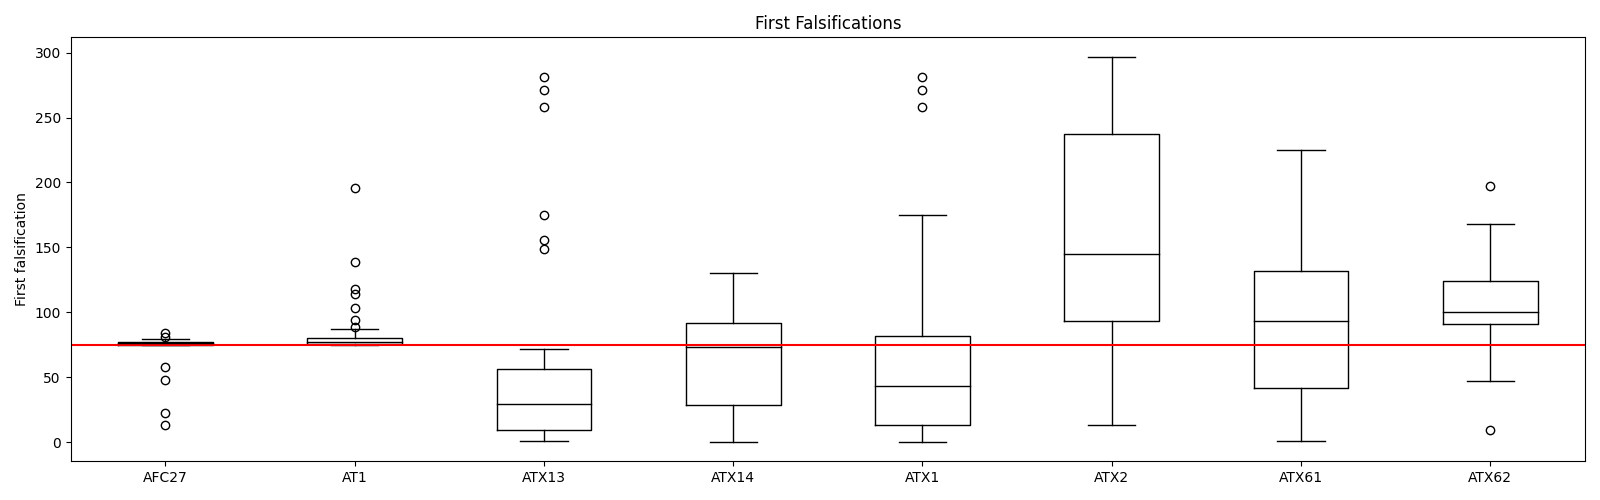

In [95]:
print("Experiment: Mean: SD:")
data = []
labels = []
for benchmark in benchmarks:
    labels += replica_prefixes[benchmark]
    for experiment in experiments[benchmark]:
        FF = np.array([first_falsification(replica) for replica in experiments[benchmark][experiment]])
        data.append(FF[FF != None])
        print("{}/{}, {}, {}".format(benchmark, experiment, np.mean(data[-1]), np.std(data[-1])))

own_boxplot(data, labels, title="First Falsifications", ylabel="First falsification", line=75)

# Times

In [96]:
print("Experiment: Mean time:")
for benchmark in benchmarks:
    for experiment in experiments[benchmark]:
        T = np.array([times(replica) for replica in experiments[benchmark][experiment]])
        print("{}/{}, {}".format(benchmark, experiment, np.mean(T)))

Experiment: Mean time:
AFC/AFC27, 194.8288467448065
AT/AT1, 114.4436737072561
AT/ATX13, 253.98433716623344
AT/ATX14, 99.8799383483082
AT/ATX1, 176.93213775727082
AT/ATX2, 731.1042749937368
AT/ATX61, 230.0580458529573
AT/ATX62, 467.3922088795272


# Visualize Test Inputs and Outputs

Visualize tests (indices given in `idx`) from a replica. For signal inputs or
outputs, we draw the plots representing the signals. For vector inputs or
outputs, we simply print the vector components. The inputs are always
denormalized, that is, they are given in the format actually given to the SUT.
Outputs are always the outputs of the SUT unmodified.

TODO

* Include robustness values in the plots.

In [ ]:
benchmark = "F16"
experiment = "F16"
replica_idx = [0]
test_idx = [0]

for i in replica_idx:
    for j in test_idx:
        plotTest(experiments[benchmark][experiment][i], j)

# Visualization of 1-3D Vector Input Test Suites.

This visualizes the test suites for SUTs which have vector input of dimension
$d$ with $d \leq 3$. The input space is represented as $[-1, 1]^d$ meaning that
inputs are not presented as denormalized to their actual ranges.

In [ ]:
benchmark = "F16"
experiment = "F16"
idx = [0]

for i in idx:
    visualize3DTestSuite(experiments[benchmark][experiment], i)

# Animate Signal Input/Output Test Suite

In [47]:
benchmark = "AT"
experiment = "ATX1_ATX1_10000"
replica_idx = 0

anim = animateResult(experiments[benchmark][experiment][replica_idx])
HTML(anim.to_jshtml())